In [10]:
#Setup
#Configuration

import os
wd = os.getcwd()
print(wd)

import warnings
warnings.filterwarnings('ignore')

#Package import
import numpy as np
import pandas as pd
from numpy import *

#Load plotting libraries

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

C:\Users\Rangika\OneDrive\Desktop\R_codes


In [11]:
#A. DATA MANAGEMENT 

#A.1. Upload the data set

data=pd.read_csv('Shibor_Historical_Data.csv')

In [12]:
print(data.head()[0:2])

         Date     O/N     1W      2W      1M      3M      6M      9M      1Y
0  08-10-2006  2.1184  2.293  2.3848  2.5319  2.6110  2.7404  2.8521  2.9543
1  09-10-2006  2.0990  2.296  2.3972  2.5522  2.6248  2.7431  2.8514  2.9549


In [19]:
#Explorative analysis

#Plot the yield curves

Date = np.array(pd.to_datetime(data['Date']))
data = data.set_index('Date')
data = data.copy()

KeyError: 'Date'

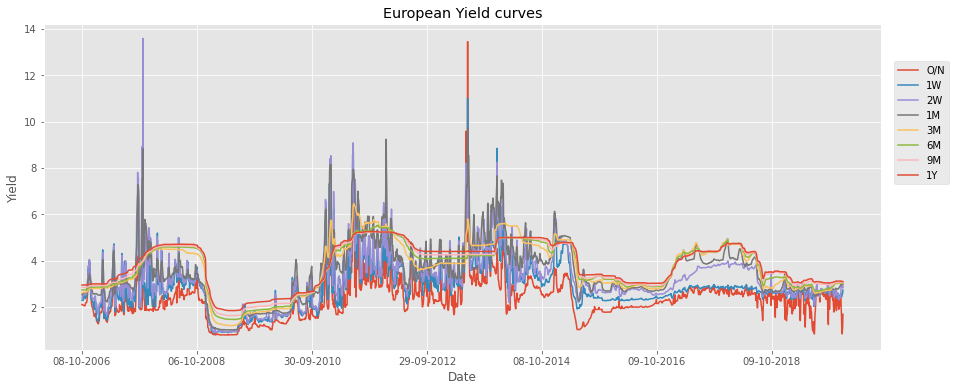

<Figure size 432x288 with 0 Axes>

In [20]:
data.plot(figsize=(15, 6))
plt.xlabel('Date')
plt.ylabel('Yield')
plt.title('European Yield curves')
plt.legend(bbox_to_anchor=(1.01,0.9), loc=2)
plt.show()
plt.savefig('fig2_1.png')

In [15]:
print(data.describe())

               O/N           1W           2W           1M           3M  \
count  3310.000000  3310.000000  3310.000000  3310.000000  3310.000000   
mean      2.357140     2.885807     3.221357     3.520973     3.668475   
std       0.921868     1.081328     1.200271     1.268544     1.146712   
min       0.800800     0.881500     0.905000     1.013300     1.204400   
25%       1.876350     2.341000     2.591050     2.729025     2.839550   
50%       2.301500     2.728000     3.046600     3.321000     3.806300   
75%       2.734500     3.298100     3.800000     4.150875     4.525300   
max      13.444000    11.004000    13.578600     9.698000     6.461100   

                6M           9M           1Y  
count  3310.000000  3310.000000  3310.000000  
mean      3.694153     3.762500     3.850230  
std       1.039031     0.993053     0.956613  
min       1.465600     1.636100     1.850400  
25%       2.908350     2.991250     3.060125  
50%       4.087900     4.097000     4.183400  
75% 

In [7]:
#Skewness

data.skew(axis = 0, skipna = True) 


O/N    2.148809
1W     1.558560
2W     1.084583
1M     0.669223
3M    -0.123612
6M    -0.320622
9M    -0.369225
1Y    -0.347277
dtype: float64

In [8]:

#kurtosis

data.kurt(axis = 0, skipna = True) 


O/N    13.518747
1W      5.692929
2W      3.703207
1M      1.227753
3M     -0.703789
6M     -0.882355
9M     -0.943650
1Y     -1.054644
dtype: float64

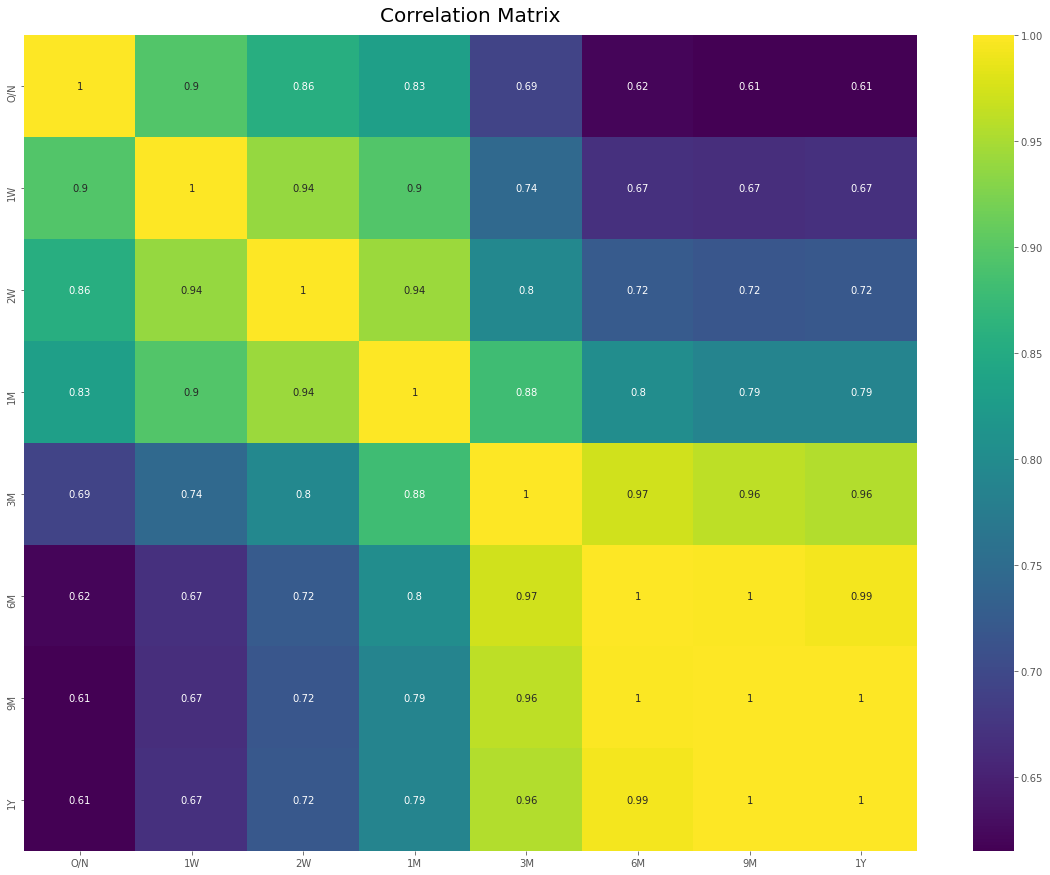

In [9]:
#Correlation plots

import seaborn as sns

plt.figure(figsize=(20,15))
plt.title('Correlation Matrix', fontsize=20,y=1.01)
sns.heatmap(np.round(data.corr(),3), annot=True, cmap="viridis");